# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов и поучаствовать в соревновании на Kaggle!
Первым делом вам предстоит построить хороший бейзлайн, а дальше пытаться улучшать, соревнуясь с другими участниками.


Ссылка на соревнование: https://www.kaggle.com/c/avito-category-prediction/overview
Данные для домашнего задания можно скачать на странице соревнования.
Чтобы ваше участие было засчитано, убедитесь, что имя в Leaderboard имеет вид: «Имя Фамилия номер_группы».

Оценивание:

Домашнее задание оценивается как обычно. Баллы указаны напротив заданий.

За соревнование даются бонусные баллы следующим образом.
Если вы пересекли baseline_2 на приватном лидерборде, ваша оценка равна 

10 - 10 * (i - 1) / M

где M — количество студентов, принявших участие в соревновании;

i — место (начиная с 1) студента в приватном лидерборде среди всех таких студентов.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* В течение 3 суток после окончания соревнования в соответствующее задание на anytask необходимо прислать код, воспроизводящий ответы для посылки, фигурирующей в приватном лидерборде. В случае отсутствия кода, воспроизводящего результат, в установленный срок студенту выставляется 0 в качестве оценки за соревнование. Если не оговорено иное, использовать любые внешние данные в соревнованиях '''запрещено'''. Под внешними данными понимаются размеченные данные, где разметка имеет прямое отношение к решаемой задаче. Грубо говоря, сборник текстов с википедии не считается внешними данными.


Мы будем работать с датасетом объявлений Avito. Нам предстоит по заголовку и тексту объявления предсказывать категорию объявления.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [5]:
train.isnull().sum()

title            0
description      2
Category_name    0
Category         0
dtype: int64

In [20]:
train[train['description'].isnull() == True]

,title,description,Category_name,Category
2920500,Оптика альтернативная задняя светодиодная Volk...,NaN,Запчасти и аксессуары,10
3655894,Оптика альтернативная задняя светодиодная Volk...,NaN,Запчасти и аксессуары,10


In [3]:
train = train.fillna(' ')

In [12]:
train.isnull().sum()

title            0
description      0
Category_name    0
Category         0
dtype: int64

In [13]:
test.isnull().sum()

title          0
description    1
itemid         0
dtype: int64

In [4]:
test = test.fillna(' ')

In [5]:
test.isnull().sum()

title          0
description    0
itemid         0
dtype: int64

## Задание 2 (0.5 балла)
Сконкатенируйте заголовок и описание в единую строку и поместите результат в отдельный столбец. Таким образом мы будет работать с одним текстом, а не с двумя.

In [6]:
train['new_column'] = train['title'] + ' ' +train['description']
train['new_column']

0          Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 ...
1          Утюг утп 1000 ватт СССР 1987 год Продам/\n Фот...
2          Возвму машину с выкупом Возьму машину в аренду...
3          Полусапожки полусапожки в отличном состоянии, ...
4          Босоножки кожаные Кожаные(натур) босоножки Kar...
                                 ...                        
4234037    Мопед Дельта Мотоланд 70 кубиков Продам новый ...
4234038    Xiaomi A2 4/64 почти новый (б/у 3 дня) Xiaomi ...
4234039    Шерстяной комбинезон Joha В отличном состоянии...
4234040                        Джинсы фирмы Zara р.152 Новые
4234041    Дом 105 м² на участке 10 сот. Продам полдома ,...
Name: new_column, Length: 4234042, dtype: object

In [7]:
test['new_column'] = test['title'] + ' ' + test['description']
test['new_column']

0          Мастерка Мастерка фирмы форвард. Белого цвета....
1          Зимние сапоги Продаю зимние сапоги, в хорошем ...
2          Видеонаблюдение 8 камер В комплект Atis AMD-2M...
3                              Запчасти для GLE Запчасти GLE
4          Бластер nerf Состояние 5+/\nПродаю потому что ...
                                 ...                        
1411343    Бетоносмеситель Россия бсэ-140 чугун Бетономеш...
1411344    Разношрокие колеса R19 оригинал Porsche Paname...
1411345    Комбенз зимний размер Комбензон на овчине .Под...
1411346    Смартфон Honor 5C В отличном состоянии. Исполь...
1411347    Слипоны Ralph Lauren 6.5 Новые без коробки , п...
Name: new_column, Length: 1411348, dtype: object

## Задание 3 (0.5 балла)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Сколько всего уникальных классов необходимо предсказать?
2. Постройте столбчатую диаграмму распределения по классам. Нормализуйте график, чтобы видеть доли, а не абсолютные значения.
3. На сколько большой дисбаланс? Какой класс имеет самую большую долю в выборке (укажите класс и долю), какой класс наименьшую (укажите класс и долю).

In [26]:
# Сколько всего уникальных классов необходимо предсказать? - 50
train.Category.nunique()

50

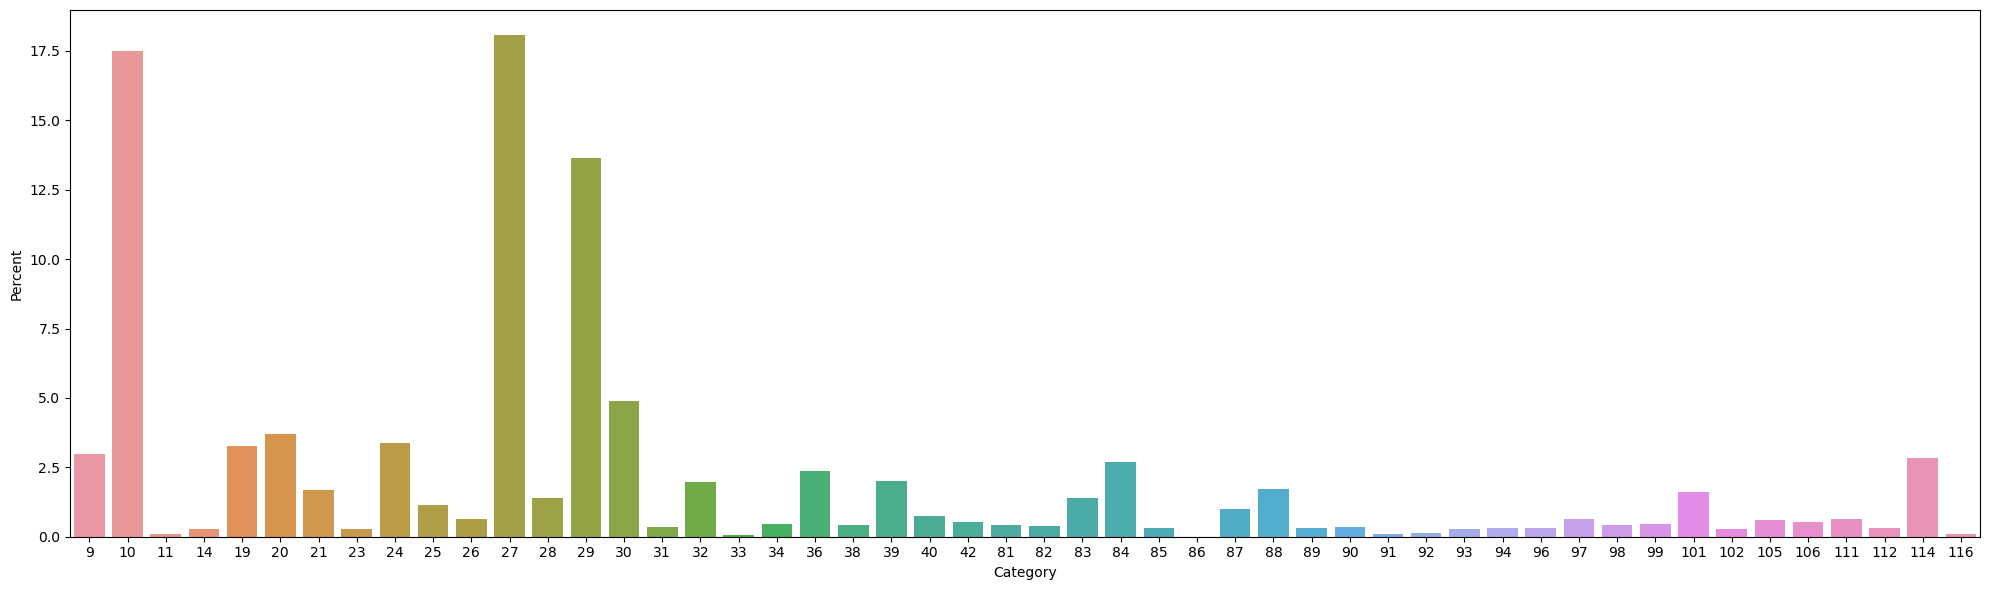

In [36]:
fig = plt.figure(figsize=(20,6))
sns.barplot(x="Category", y="Category", data=train, estimator=lambda x: len(x) / len(train) * 100).set(ylabel="Percent")
fig.tight_layout()

Большой дисбаланс. "Одежда, обувь, аксессуары" - самая популярная категория, 765 120 объектов, 18%. "Недвижимость за рубежом" - Наименее популярная категория, 0,004%

In [38]:
train[train['Category'] == 27]['Category_name']

3          Одежда, обувь, аксессуары
4          Одежда, обувь, аксессуары
5          Одежда, обувь, аксессуары
7          Одежда, обувь, аксессуары
8          Одежда, обувь, аксессуары
                     ...            
4234008    Одежда, обувь, аксессуары
4234018    Одежда, обувь, аксессуары
4234021    Одежда, обувь, аксессуары
4234029    Одежда, обувь, аксессуары
4234030    Одежда, обувь, аксессуары
Name: Category_name, Length: 765120, dtype: object

In [39]:
train[train['Category'] == 86]['Category_name']

23359      Недвижимость за рубежом
38633      Недвижимость за рубежом
46991      Недвижимость за рубежом
156204     Недвижимость за рубежом
256682     Недвижимость за рубежом
                    ...           
4193156    Недвижимость за рубежом
4193666    Недвижимость за рубежом
4199281    Недвижимость за рубежом
4223539    Недвижимость за рубежом
4226945    Недвижимость за рубежом
Name: Category_name, Length: 165, dtype: object

In [44]:
(765120/train.shape[0])*100

18.07067572782698

In [45]:
(165/train.shape[0])*100

0.0038969854337769913

## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью. Для test части нам неизвестны истинные значения, и они понадобятся только тогда, когда мы будем отправлять решение на Kaggle.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = train.title
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

print(X.shape)

(4234042, 469015)


## Задание 5 (0.5 балла)

В предыдущем пункте у вас должная была получится очень большая матрица. Это не дело.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле _vocabulary инстанса этого класса.

1. Найдите в этом словаре все слова, которые начинаются на цифру. Сколько таких слов нашлось?

2. Найдите все слова, которые начинаются на символы пунктуации. Сколько таких слов нашлось? 

In [50]:
dictionary = vectorizer.vocabulary_

In [51]:
len([w for w in dictionary if w.isdigit()])

38358

In [55]:
from string import punctuation

len([w for w in dictionary if w not in punctuation])

469015

## Задание 6 (2.5 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью word_tokenizer из пакета nltk
2. Удалит все токены содержащие числа и пунктуацию
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords('russian')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функии на самом первом описании товара в датасете.

Важно: так как функию будет необходимо запускать на большом корпусе, подумайте об эффективной реализации. Постарайтесь решить задачу в минимальное количество циклов и копирований.

Референсная реализация на компьютере автора работала 230 секунд на 100к строчек.

In [9]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('russian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\julia_krav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\julia_krav\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [19]:
from nltk.stem.snowball import SnowballStemmer

def function(text):
    stem = SnowballStemmer("russian") 
    stop_words = stopwords.words('russian')
    res = [stem.stem(str.lower(w)) for w in word_tokenize(text) if w.isalpha() and w not in stop_words]
    return res

In [20]:
function(train.title[0])

['эб', 'renault', 'nissan', 'dci', 'delphi', 'год']

## Задание 7 (1 балл)

1. Возьмите случайные 500к строк из датасета. Постройте по ним CountVectorizer с применением вашего токенизатора.
2. Разбейте полученную матрицу на train, test в отношении 4 к 1. Не забудьте про target переменную.
3. Обучите SGDClassifier на полученной выборке.
4. Посчитайте метрику accuracy

In [27]:
import numpy as np
df = np.random.choice(train.shape[0], size=500000, replace=False)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

cnt_vec = CountVectorizer(tokenizer=function)
X = cnt_vec.fit_transform(train.title[df])
y = train.Category[df].to_numpy()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=101)

In [41]:
from sklearn.metrics import accuracy_score

In [38]:
clf = SGDClassifier(loss='modified_huber', penalty='l2',alpha=0.00005, random_state=101, max_iter=100, tol=None)
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

0.82925

## Задание 8 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество.
2. Мы можем еще сильнее уменьшите размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = train.title[df]
vectorizer = TfidfVectorizer(tokenizer=function)
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['', 'a', 'aa', ..., 'ящичк', 'яэл', 'яэмз'], dtype=object)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=101)

clf = SGDClassifier(loss='modified_huber', penalty='l2',alpha=0.00005, random_state=101, max_iter=100, tol=None)
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

0.82688

In [47]:
corpus = train.title[df]
vectorizer = TfidfVectorizer(tokenizer=function, max_df=0.9)
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['', 'a', 'aa', ..., 'ящичк', 'яэл', 'яэмз'], dtype=object)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=101)

clf = SGDClassifier(loss='modified_huber', penalty='l2',alpha=0.00005, random_state=101, max_iter=100, tol=None)
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

0.82688

## Задание 9 (1 балл)
Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 30000.
2. Какой из трех подходов показал самый высокий результат?

In [51]:
from sklearn.feature_extraction.text import HashingVectorizer
corpus = train.title[df]
vectorizer = HashingVectorizer(tokenizer=function, n_features=30000)
X = vectorizer.fit_transform(corpus)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=101)

clf = SGDClassifier(loss='modified_huber', penalty='l2',alpha=0.00005, random_state=101, max_iter=100, tol=None)
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

C:\Users\julia_krav\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.81341

## Задание 10 (1.5 балла)

Пришло время выйти в мир. Отправляйтесь на Kaggle Inclass и сделайте первую посылку. Там вы найдете инструкцию как сформировать файл с предсказаниями и отправить его.